In [1]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=5e-5), metrics=["accuracy"])

In [3]:
import os

cb_earlystopping = keras.callbacks.EarlyStopping(patience=10)
cb_model_checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 3
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
cb_tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [4]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[cb_earlystopping, cb_model_checkpoint, cb_tensorboard])

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 6.3170 - accuracy: 0.1616 - val_loss: 2.2560 - val_accuracy: 0.2028
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.1047 - accuracy: 0.2357 - val_loss: 2.0101 - val_accuracy: 0.2710
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9826 - accuracy: 0.2716 - val_loss: 1.9654 - val_accuracy: 0.2724
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9046 - accuracy: 0.3014 - val_loss: 1.9286 - val_accuracy: 0.2970
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8365 - accuracy: 0.3290 - val_loss: 1.8214 - val_accuracy: 0.3302
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7821 - accuracy: 0.3520 - val_loss: 1.8209 - val_accuracy: 0.3486
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7381 - accuracy: 0.3695 - val_loss: 1.7496 -

In [5]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5164 - accuracy: 0.4608


[1.5163871049880981, 0.4607999920845032]

In [7]:
model_add_batch = keras.models.Sequential()
model_add_batch.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_add_batch.add(keras.layers.BatchNormalization())
for layer in range(20):
    model_add_batch.add(keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model_add_batch.add(keras.layers.BatchNormalization())
    model_add_batch.add(keras.layers.Activation("elu"))
model_add_batch.add(keras.layers.Dense(10, activation="softmax"))

model_add_batch.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=5e-4), metrics=["accuracy"])

cb_earlystopping = keras.callbacks.EarlyStopping(patience=10)
cb_model_checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_batch_model.h5", save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_batch_logs", "run_batch_{:03d}".format(run_index))
cb_tensorboard = keras.callbacks.TensorBoard(run_logdir)

model_add_batch.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[cb_earlystopping, cb_model_checkpoint, cb_tensorboard])

model_add_batch = keras.models.load_model("my_cifar10_batch_model.h5")
model_add_batch.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 22s 12ms/step - loss: 1.8319 - accuracy: 0.3436 - val_loss: 1.7187 - val_accuracy: 0.3908
Epoch 2/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.6649 - accuracy: 0.4076 - val_loss: 1.5634 - val_accuracy: 0.4378
Epoch 3/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5969 - accuracy: 0.4340 - val_loss: 1.5399 - val_accuracy: 0.4496
Epoch 4/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5484 - accuracy: 0.4494 - val_loss: 1.5074 - val_accuracy: 0.4532
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5021 - accuracy: 0.4672 - val_loss: 1.5173 - val_accuracy: 0.4568
Epoch 6/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4694 - accuracy: 0.4811 - val_loss: 1.4353 - val_accuracy: 0.4926
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4355 - accuracy: 0.4919 - val_loss: 1

[1.3075640201568604, 0.550599992275238]

In [8]:
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

model_selu.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=7e-4), metrics=["accuracy"])

cb_earlystopping = keras.callbacks.EarlyStopping(patience=10)
cb_model_checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_selu_logs", "run_selu_{:03d}".format(run_index))
cb_tensorboard = keras.callbacks.TensorBoard(run_logdir)

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model_selu.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=[cb_earlystopping, cb_model_checkpoint, cb_tensorboard])

model_selu = keras.models.load_model("my_cifar10_selu_model.h5")
model_selu.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 1.9225 - accuracy: 0.3124 - val_loss: 1.7925 - val_accuracy: 0.3774
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7055 - accuracy: 0.3960 - val_loss: 1.7446 - val_accuracy: 0.3924
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6104 - accuracy: 0.4283 - val_loss: 1.5793 - val_accuracy: 0.4386
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5353 - accuracy: 0.4598 - val_loss: 1.5461 - val_accuracy: 0.4596
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4849 - accuracy: 0.4796 - val_loss: 1.5635 - val_accuracy: 0.4300
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4371 - accuracy: 0.4963 - val_loss: 1.5492 - val_accuracy: 0.4684
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3944 - accuracy: 0.5156 - val_loss: 1.5159 -

[2.8234598636627197, 0.09719999879598618]

In [11]:
import numpy as np

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

mc_model = keras.models.Sequential([MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model_selu.layers])

def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
np.mean(y_pred == y_valid[:, 0])

0.5024

In [14]:
import matplotlib.pyplot as plt
import math

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

352/352 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1449


(9.999999747378752e-06,
 9.615227699279785,
 2.612095355987549,
 4.055954388209752)

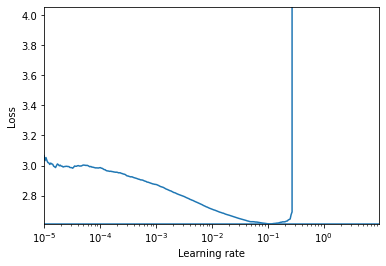

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 9ms/step - loss: 2.0751 - accuracy: 0.2809 - val_loss: 1.7801 - val_accuracy: 0.3692
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.7671 - accuracy: 0.3760 - val_loss: 1.7079 - val_accuracy: 0.3918
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.6280 - accuracy: 0.4217 - val_loss: 1.6681 - val_accuracy: 0.4122
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 1.5544 - accuracy: 0.4494 - val_loss: 1.7590 - val_accuracy: 0.4008
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4934 - accuracy: 0.4664 - val_loss: 1.5920 - val_accuracy: 0.4502
Epoch 6/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4522 - accuracy: 0.4852 - val_loss: 1.6635 - val_accuracy: 0.4208
Epoch 7/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4220 - accuracy: 0.4932 - val_loss: 1.5988 - val_accuracy: 0.4538
Epoch 